In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
yield_df = pd.read_csv('/kaggle/input/ai-data/yield_df.csv')  # Replace with your file path

In [3]:
# Selecting relevant columns for prediction
yield_data = yield_df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'hg/ha_yield']]

# Dropping rows with missing values for simplicity
yield_data = yield_data.dropna()

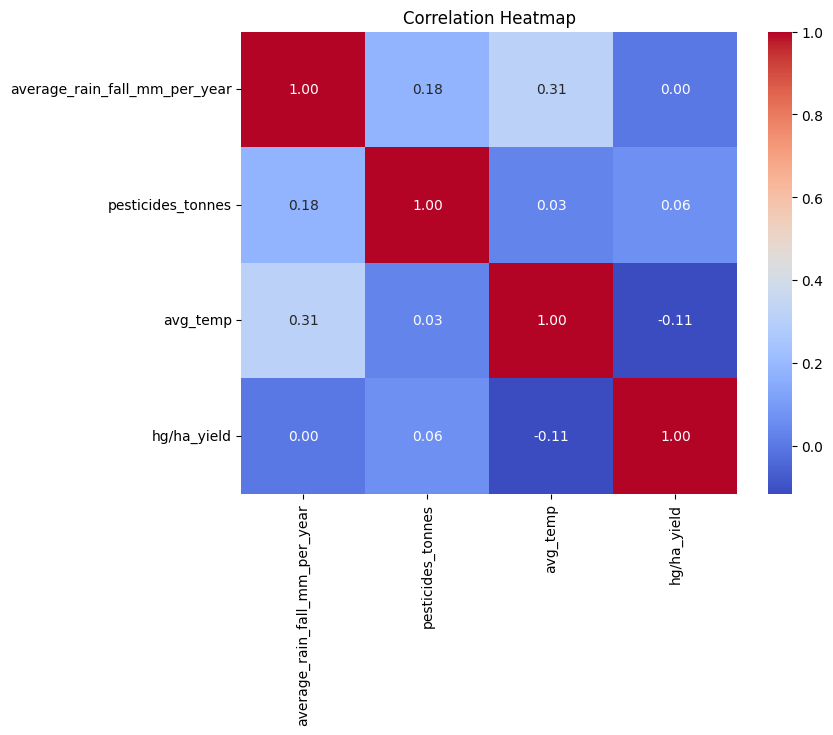

In [4]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(yield_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


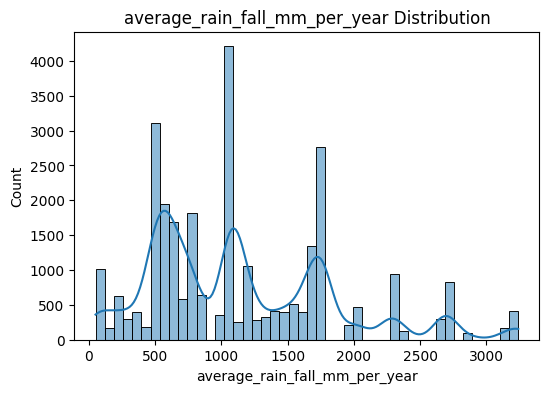

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


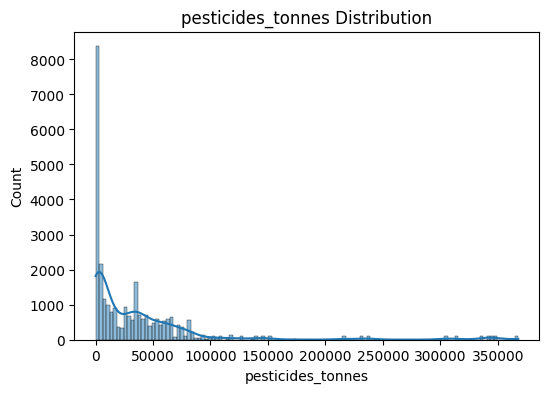

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


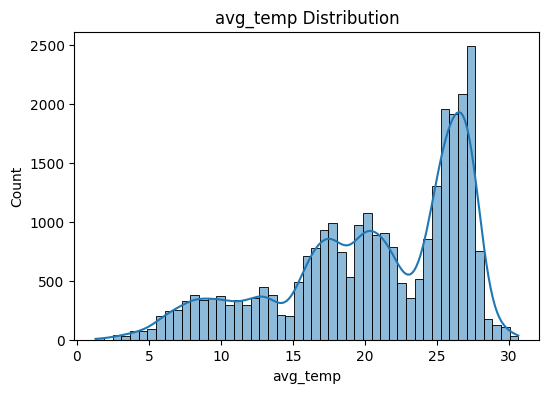

In [5]:
# Feature distribution plots
for column in ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']:
    plt.figure(figsize=(6, 4))
    sns.histplot(yield_data[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.show()

In [6]:
# Splitting the data into features (X) and target (y)
X = yield_data[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = yield_data['hg/ha_yield']

In [7]:
# Standardizing features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

In [9]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 7098843519.789056
R² Score: 0.021344837717794163


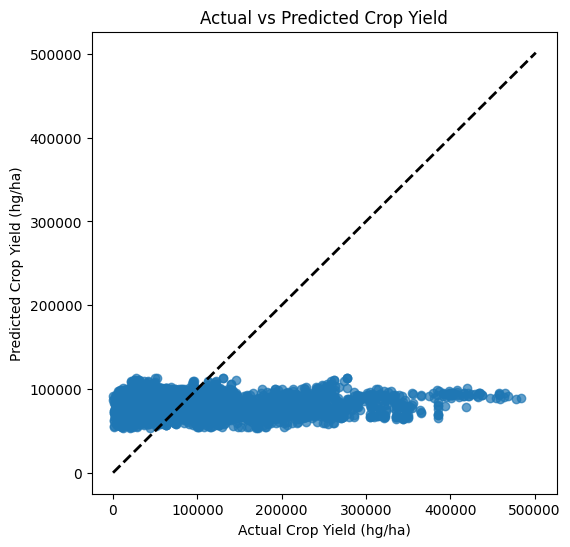

In [10]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Crop Yield (hg/ha)')
plt.ylabel('Predicted Crop Yield (hg/ha)')
plt.title('Actual vs Predicted Crop Yield')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Line for perfect prediction
plt.show()

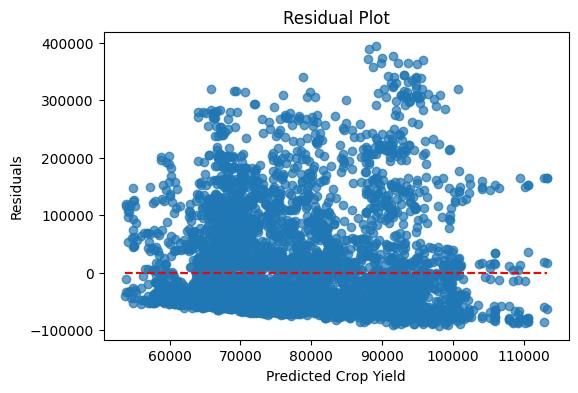

In [11]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Crop Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()